In [14]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import (
    ClassDepLossMultilayerPerceptron,
    HardBoostrappingMultilayerPerceptron
)

In [15]:
# Network Parameters
n_input = 2
n_classes = 3
n_samples = 800

(400, 2)
(400, 3)


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

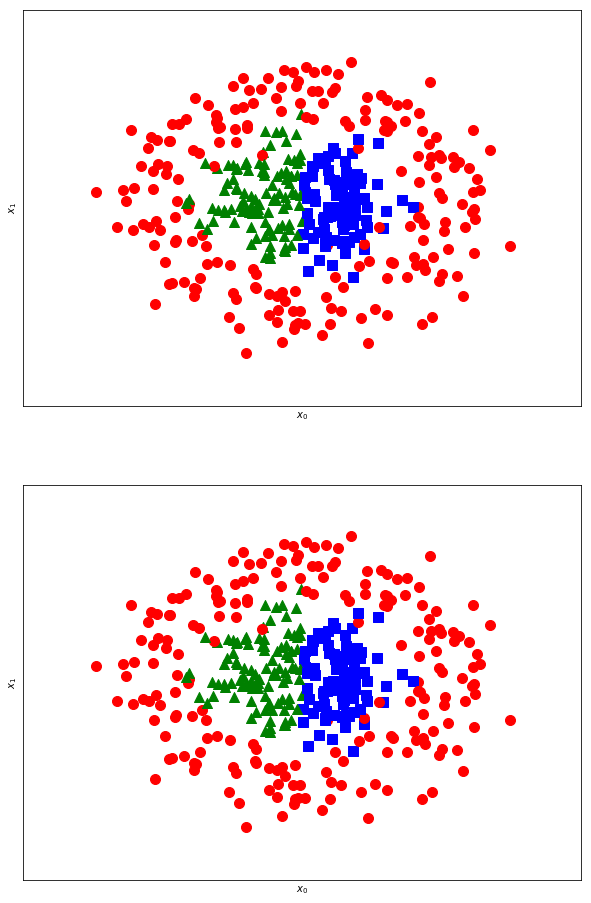

In [16]:
X, y = datasets.make_circles(n_samples=n_samples, noise=0.2, factor=0.3, random_state=0)
second_cls_idx = np.logical_and(X[:, 0] < 0., (1-y)<np.finfo(float).eps)
y[second_cls_idx] = 2
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)
fit_plot(X_train, Y_train)

In [17]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

## Frequency weighted

('Using class_weight', array([ 1.        ,  6.97727273,  5.90384615]))
('Epoch:', '0001', 'cost=', '1.034340531')
('Epoch:', '0011', 'cost=', '0.937829971')
('Epoch:', '0021', 'cost=', '0.936939031')
('Epoch:', '0031', 'cost=', '0.920210272')
('Epoch:', '0041', 'cost=', '0.855578512')
('Epoch:', '0051', 'cost=', '0.820642605')
('Epoch:', '0061', 'cost=', '0.812475905')
('Epoch:', '0071', 'cost=', '0.806633458')
('Epoch:', '0081', 'cost=', '0.804094478')
('Epoch:', '0091', 'cost=', '0.802501753')
('Using class_weight', array([ 1.        ,  6.97727273,  5.90384615]))
('Using class_weight', array([ 1.        ,  6.97727273,  5.90384615]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

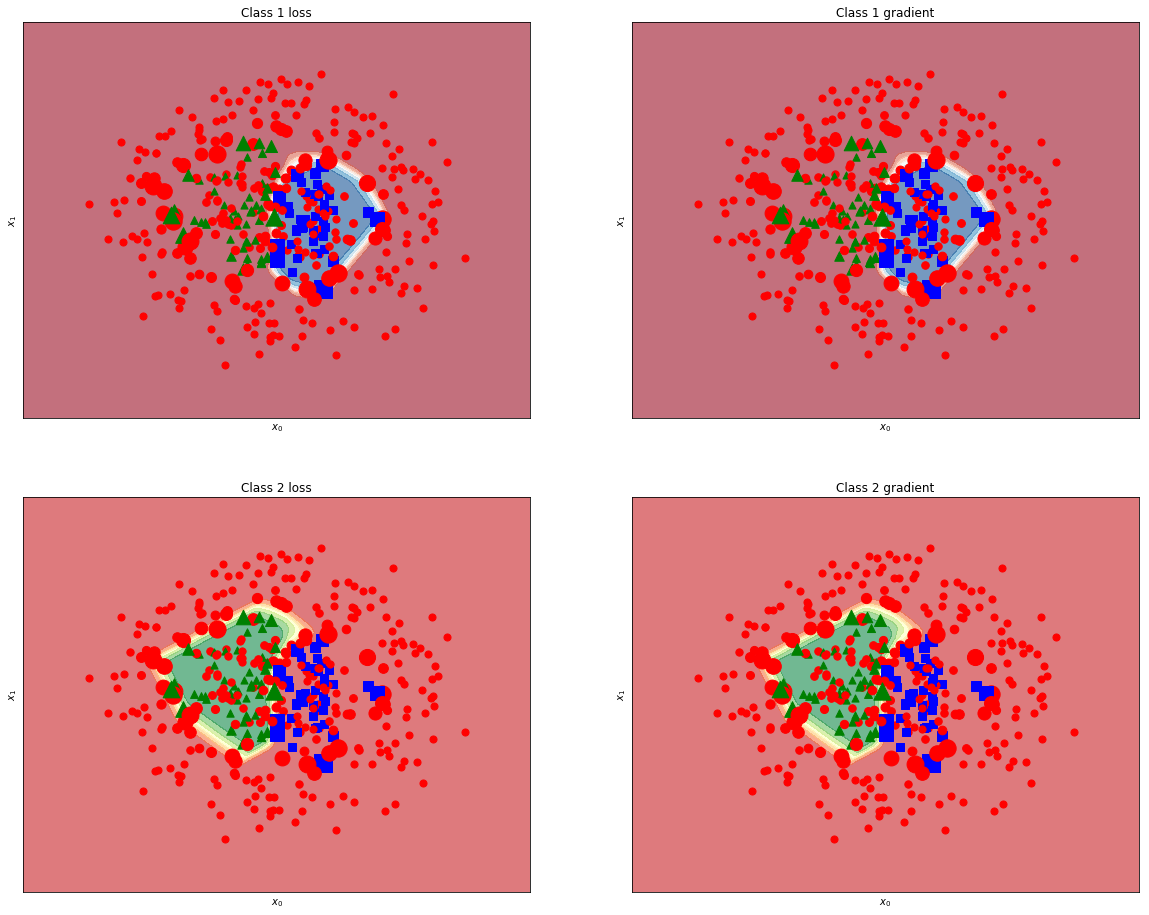

In [18]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, ["loss", "gradient"])

In [24]:
mp.verbose = False
loss = mp.calc_loss(X_train, Y_train_pu.get(0.5))
prob = mp.predict_proba(X_train)
y_pred = mp.predict(X_train)
y_noisy = np.argmax(Y_train_pu.get(0.5), axis=1)

for i in range(y_train.shape[0]):
    print("---")
    print("{}-th example:")
    print("loss: {}".format(loss[i]))
    print("probability: {}".format(prob[i]))
    print("true label: {}, noisy label: {}, predicted label: {}".format(
        y_train[i], y_noisy[i], y_pred[i]))

---
{}-th example:
loss: [ 0.68747663  0.69986534  1.29521763]
probability: [ 0.01137347  0.01339141  0.97523516]
true label: 2, noisy label: 0, predicted label: 2
---
{}-th example:
loss: [ 0.68989635  0.69378144  1.30757976]
probability: [ 0.00651231  0.00126801  0.99221969]
true label: 2, noisy label: 0, predicted label: 2
---
{}-th example:
loss: [ 0.58743119  0.69314718  1.15464187]
probability: [  2.23943487e-01   3.82214571e-14   7.76056588e-01]
true label: 0, noisy label: 0, predicted label: 2
---
{}-th example:
loss: [ 0.65350056  0.69314915  1.25474584]
probability: [  8.09302106e-02   4.01402986e-06   9.19065714e-01]
true label: 2, noisy label: 0, predicted label: 2
---
{}-th example:
loss: [ 0.39681596  0.69314718  0.8433013 ]
probability: [  7.19322383e-01   1.21384212e-13   2.80677587e-01]
true label: 0, noisy label: 0, predicted label: 0
---
{}-th example:
loss: [ 0.69530648  0.69314843  1.85631335]
probability: [  4.31392761e-03   2.48733977e-06   9.95683551e-01]
true l

## Frequency weighted & unlabelled weighted

('Using class_weight', array([  1.        ,  13.95454545,  11.80769231]))
('Epoch:', '0001', 'cost=', '1.277912021')
('Epoch:', '0006', 'cost=', '1.250516266')
('Epoch:', '0011', 'cost=', '1.221669167')
('Epoch:', '0016', 'cost=', '1.167093754')
('Epoch:', '0021', 'cost=', '1.117329866')
('Epoch:', '0026', 'cost=', '1.081604779')
('Epoch:', '0031', 'cost=', '1.058576852')
('Epoch:', '0036', 'cost=', '1.047558129')
('Epoch:', '0041', 'cost=', '1.041519403')
('Epoch:', '0046', 'cost=', '1.035282612')
('Epoch:', '0051', 'cost=', '1.029766083')
('Epoch:', '0056', 'cost=', '1.009813666')
('Epoch:', '0061', 'cost=', '0.991171092')
('Epoch:', '0066', 'cost=', '0.985077232')
('Epoch:', '0071', 'cost=', '0.981183022')
('Epoch:', '0076', 'cost=', '0.977640167')
('Epoch:', '0081', 'cost=', '0.973773450')
('Epoch:', '0086', 'cost=', '0.971607730')
('Epoch:', '0091', 'cost=', '0.969312981')
('Epoch:', '0096', 'cost=', '0.967353955')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

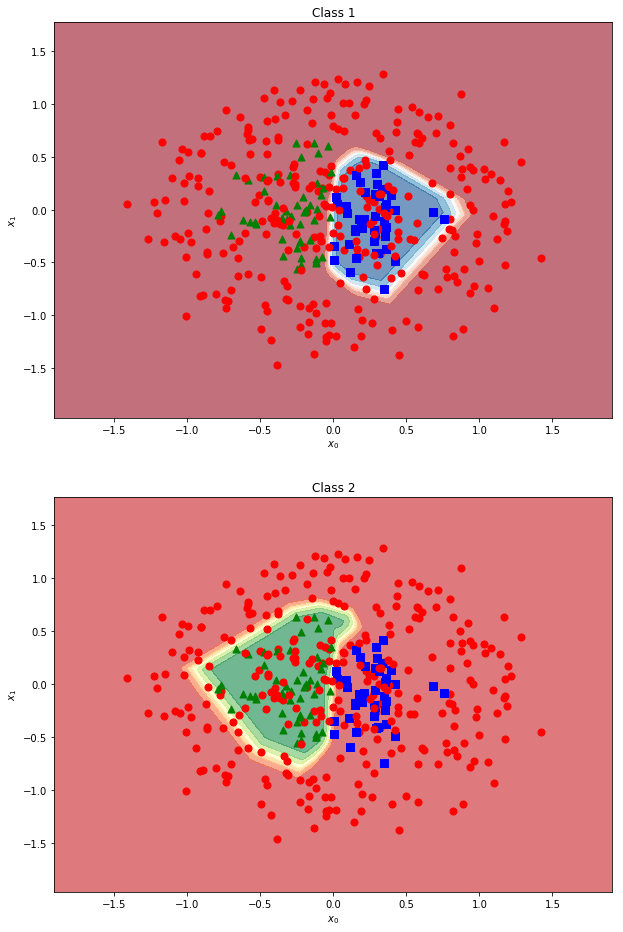

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=100,
                          class_weight=[0.5, 1, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([  1.        ,  13.95454545,  11.80769231]))
('Epoch:', '0001', 'cost=', '0.852054879')
('Epoch:', '0006', 'cost=', '0.840396002')
('Epoch:', '0011', 'cost=', '0.738706663')
('Epoch:', '0016', 'cost=', '0.670238450')
('Epoch:', '0021', 'cost=', '0.588336915')
('Epoch:', '0026', 'cost=', '0.550951168')
('Epoch:', '0031', 'cost=', '0.548415296')
('Epoch:', '0036', 'cost=', '0.537563875')
('Epoch:', '0041', 'cost=', '0.531596832')
('Epoch:', '0046', 'cost=', '0.530892931')
('Epoch:', '0051', 'cost=', '0.528742053')
('Epoch:', '0056', 'cost=', '0.529585645')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

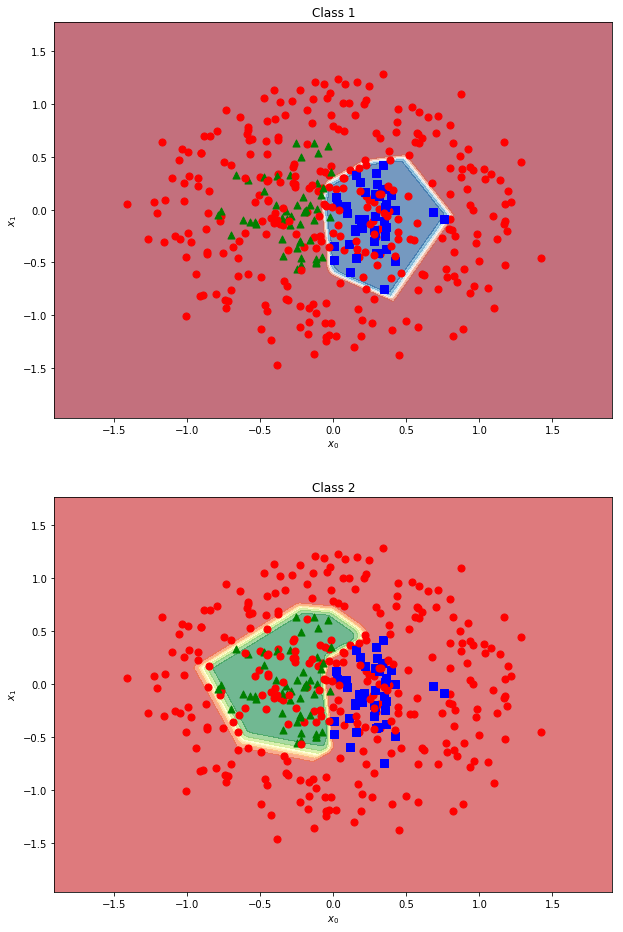

In [8]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=60,
                          class_weight=[0.5, 1, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)